<a href="https://colab.research.google.com/github/ctorressopris/data_science/blob/main/DS_C3_SC1_Cesar_Jose_Torres_Cuellar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reto: Explorando el índice de felicidad**

Introducción:

El Informe Mundial sobre la Felicidad es una encuesta que clasifica a 156 países por sus niveles de bienestar, tomando en cuenta 6 factores:

* Producción económica
* Apoyo social
* Esperanza de vida
* Libertad
* Generosidad
* Ausencia de corrupción

El primer informe se publicó en 2012 y continúa ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más indicadores de felicidad para informar sus decisiones de formulación de políticas.

En este sentido, se tomará el estudio del 2019 para explorar los datos por país o región y obtener gráficas relevantes. El archivo incluye el puntaje (score) en una escala donde la mejor vida posible está representada con 10 y la peor con 0. Las siguientes columnas representan la medida en que los seis factores contribuyen a evaluar la felicidad en cada país.

Objetivo:

* Realizar un análisis exploratorio de los datos para conocer su estructura y contenido.
* Visualizar información relevante en gráficas independientes, superpuestas y conjuntas (subgráficas).
* Utilizar varios tipos de gráficos para detectar patrones, tendencias y relaciones entre los datos.

Instrucciones:

Para lograr lo anterior, descarga el archivo DS_C3SC1_Formato.docx, el archivo Happiness_reporte.csv y el dataframe Metadata.cvs, y realiza los siguientes pasos:

1. Genera una libreta en Google Colab, cuya estructura esté basada en los análisis solicitados.
2. Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.

In [2]:
import csv
import re
import pandas as pd

# Especificar la ruta del archivo CSV
file_path = 'Happiness_report.csv'

# Se establece formato para mostrar los numeros float con precision de 3 decimales
pd.set_option('display.float_format', '{:.3f}'.format)

# Leer el archivo CSV y guardarlo en el dataframe df_happiness, con los parametros on_bad_lines para ignorar
# las lineas que den error y colocar una cadena vacia en los valores Nan
df_happiness = pd.read_csv(file_path, on_bad_lines='skip', na_values=[''],)

# Imprime la descripcion del dataframe df_happiness
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


3. A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [3]:
# Se hace el filtrado de df_happiness para guardar en df_happiness_mexico solo los registros
# que correspondan a Mexico
df_happiness_mexico = df_happiness[df_happiness['Country or region'] == 'Mexico']

# Se usa la funcion set_index para establecer la columna de pais como indice
df_happiness_mexico = df_happiness_mexico.set_index('Country or region')

# Imprime el dataframe
df_happiness_mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.070,1.323,0.861,0.433,0.074,0.073


4. Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

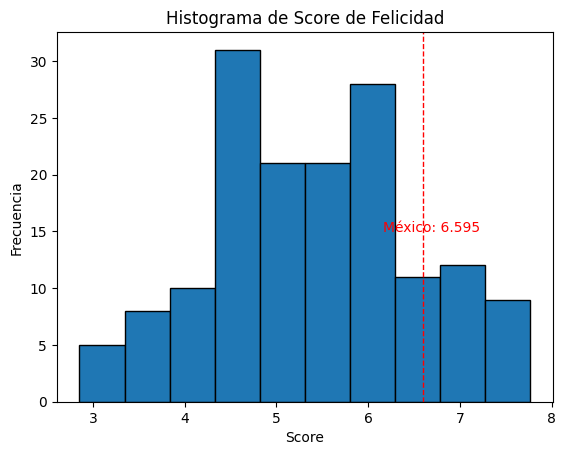

In [4]:
# Se importan las librerias de matplotlib
import matplotlib.pyplot as plt

# Se obtiene el score de Mexico, filtrando por los registros que tengan por pais a Mexico
# y obteniendo el valor de la columna score y el valor del primer registro
mexico_score = df_happiness[df_happiness['Country or region'] == 'Mexico']['Score'].values[0]

# Se crea el histograma para la columna 'score', define el marco de las barras para tener mejor visibilidad
# con el parametro edgecolor='black'
plt.hist(df_happiness['Score'], edgecolor='black')

# Se añade la etiqueta de texto para el valor de México con la funcion axvline
# los parametros color linestyle linewidth definen el color, tipo de linea y ancho de la linea
# que marcara la posicion de mexico
plt.axvline(mexico_score, color='red', linestyle='dashed', linewidth=1)

# Se usa la función text para colocar el texto, el primer parametro coloca el texto en la posicion X donde
# se encuentra el score de Mexico. Se usa 15 como valor de Y, para centrarlo verticalmente. El tercer parametro
# indica el valor de la etiqueta con Mexico y su score como valores, sigue el color del texto en rojo y el
# centrado del texto horizontalmente
plt.text(mexico_score + 0.1, 15, f'México: {mexico_score}',
         color='red', ha='center')

# Se añade el titulo
plt.title('Histograma de Score de Felicidad')
# Se añade la etiqueta de la escala X
plt.xlabel('Score')
# Se añade la etiqueta de la escala y
plt.ylabel('Frecuencia')

# Se muestra el gráfico
plt.show()

5. Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

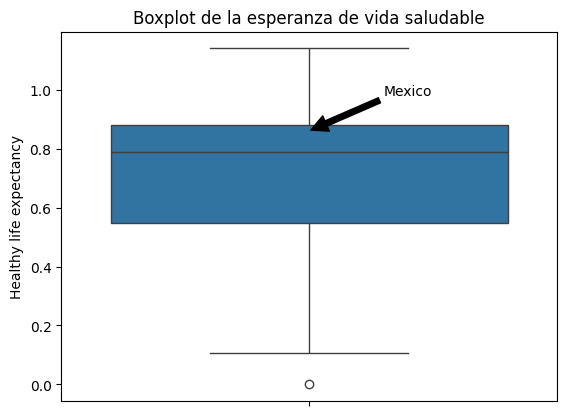

In [5]:
import seaborn as sns

# Se crea el boxplot con la columna Healthy life expectancy en el eje Y
sns.boxplot(y=df_happiness['Healthy life expectancy'])

# Se obtiene el score de Mexico, filtrando por los registros que tengan por pais a Mexico
# y obteniendo el valor de la columna Healthy life expectancy y el valor del primer registro
mexico_life_expectancy = df_happiness[df_happiness['Country or region'] == 'Mexico']['Healthy life expectancy'].values[0]

# Se hace la anotación de la ubicacion del valor de México en el gráfico, el primner parametro es el texto de Mexico,
# el parametro xy son las coordenadas a donde apuntara la flecha y xytext la ubicacion del texto y origen de la flecha
# arrowprops indica las propiedades de la flecha
plt.annotate('Mexico', xy=(0, mexico_life_expectancy), xytext=(0.15, mexico_life_expectancy + 0.12),
             arrowprops=dict(facecolor='black', shrink=0.02))

# Se añade el titulo
plt.title('Boxplot de la esperanza de vida saludable')

# Se añade la etiqueta de la escala y
plt.ylabel('Healthy life expectancy')
plt.show()

6. Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.

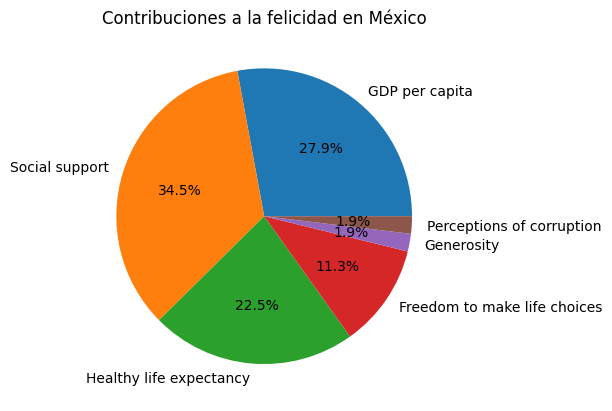

In [6]:
# Se obtiene la serie con los datos de Mexico
mexico_data = df_happiness[df_happiness['Country or region'] == 'Mexico'].iloc[0]

# Se crea un mapean los factores que contribuyen a evaluar la felicidad en México
factors = {
    'GDP per capita': mexico_data['GDP per capita'],
    'Social support': mexico_data['Social support'],
    'Healthy life expectancy': mexico_data['Healthy life expectancy'],
    'Freedom to make life choices': mexico_data['Freedom to make life choices'],
    'Generosity': mexico_data['Generosity'],
    'Perceptions of corruption': mexico_data['Perceptions of corruption']
}

# Se crea la gráfica circular donde el primer parametros de las X, seran los factores
# las etiquetas las llaves del diccionario de factores y el formato con que aparecen los
# valores de porcentajes
plt.pie(factors.values(), labels=factors.keys(), autopct='%0.1f%%')

# Se añade el titulo
plt.title('Contribuciones a la felicidad en México')
plt.show()


7. Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

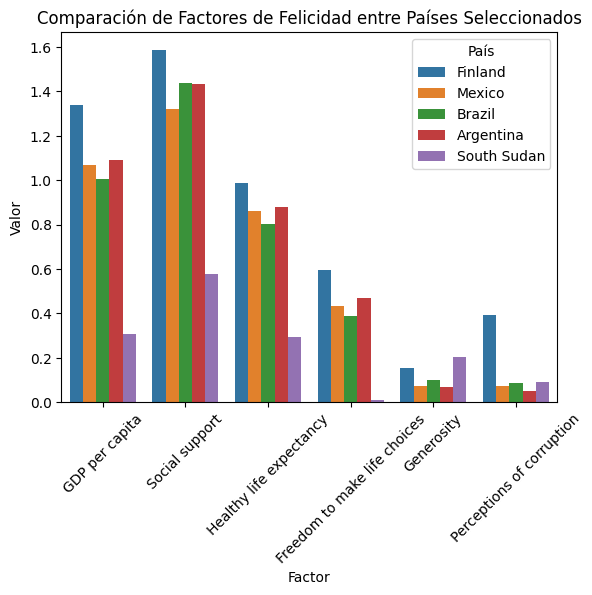

In [7]:
# Se ordenar el DataFrame por el puntaje de felicidad
df_happiness = df_happiness.sort_values(by='Score', ascending=False)

# Se filtrar los cinco países, el más feliz, el menos feliz, México y dos más de interés: 'Finland', 'Mexico', 'Brazil', 'Argentina', 'South Sudan'
countries_of_interest = ['Finland', 'Mexico', 'Brazil', 'Argentina', 'South Sudan']
# Se crea un nuevo dataframe filtrado con los paises buscados, usando la funcion isin
df_filtrado = df_happiness[df_happiness['Country or region'].isin(countries_of_interest)]

# Se expanden los registros de las columnas que funcionan como factores, para poder graficar en una misma grafico, factores comparables
# los parametros id_vars, indican que sobre esa columna ("pais"), seran la llave sobre la cual se desplegaran los registos de las columnas asociadas
# a las columnas de factores y su valor.
df_fusionado = df_filtrado.melt(id_vars=['Country or region'],
                             value_vars=['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
                             var_name='Factor',
                             value_name='Value')

# Se visualizar en un gráfico de barras agrupadas los factores en el dataframe
# df_fusionado
sns.barplot(x='Factor', y='Value', hue='Country or region', data=df_fusionado)

plt.title('Comparación de Factores de Felicidad entre Países Seleccionados')
plt.xlabel('Factor')
plt.ylabel('Valor')
plt.legend(title='País')
# Rotamos las etiquetas del eje X para que no se traslapen los valores
plt.xticks(rotation=45)
plt.show()

8. Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

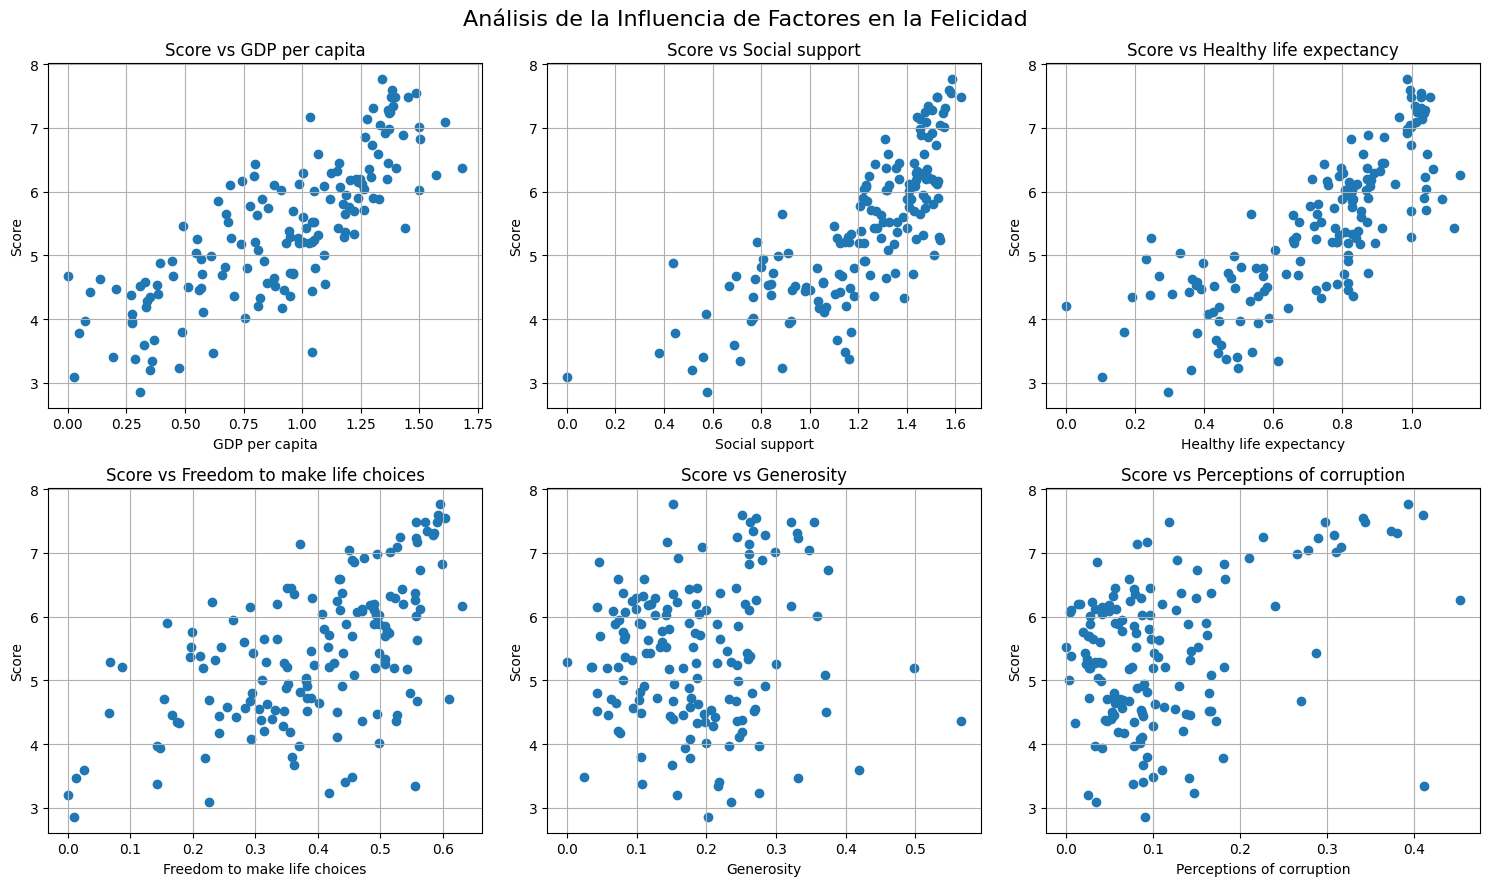

In [13]:
# Se hace una lista de factores a evaluar
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Se crea una matriz de subgráficas de 2x3 con una tamaño mayor al default para poder visualizar mejor las graficas
fig, axs = plt.subplots(2, 3, figsize=(15, 9))
# Se agrega el titulo al grupo de graficas
fig.suptitle('Análisis de la Influencia de Factores en la Felicidad', fontsize=16)

# Se hace una iteracion sobre la lista de  factores y se crea un scatter plot para cada uno
for ax, factor in zip(axs.flatten(), factores):
    # Se crea el scatter plot para cada factor en eje x y el score fijo en el eje y
    ax.scatter(df_happiness[factor], df_happiness['Score'])
    ax.set_xlabel(factor)
    ax.set_ylabel('Score')
    ax.set_title(f'Score vs {factor}')
    ax.grid(True)

# Ajustar el layout para que las etiquetas no se encimen
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

9. Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

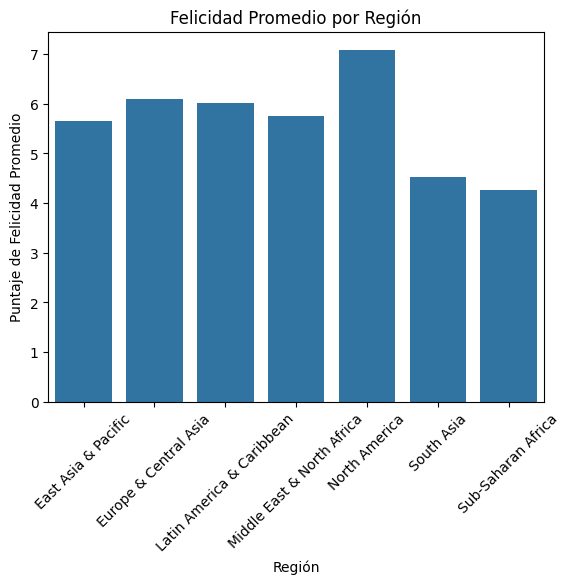

In [19]:
# Especificar la ruta del archivo CSV
file_path_metadata = 'Metadata.csv'

# Leer el archivo CSV y guardarlo en el dataframe df_metadata, con los parametros on_bad_lines para ignorar
# las lineas que den error y colocar una cadena vacia en los valores Nan
df_metadata = pd.read_csv(file_path_metadata, on_bad_lines='skip', na_values=[''],)

# Se unen df_happiness y df_metadata por la columna de país en df_happiness y tablename en
# df_metadata
merged_df = pd.merge(df_happiness, df_metadata, left_on='Country or region', right_on='TableName')

# Se calcula la felicidad promedio por región usando la funcion groupby, y se saca el
# promedio del score
average_happiness_by_region = merged_df.groupby('Region')['Score'].mean().reset_index()

# Graficar la felicidad promedio por región
sns.barplot(data=average_happiness_by_region, x='Region', y='Score')

# Se asignan los valores de las etiquetas
plt.title('Felicidad Promedio por Región')
plt.xlabel('Región')
plt.ylabel('Puntaje de Felicidad Promedio')
# Se rotan las etiquetas del eje x para que no se encimen
plt.xticks(rotation=45)
plt.show()